# Final Project - Supervised Machine Learning on Musical attributes to predict Streams



## Project Topic

For my final project, I wanted to analyze how different musical characteristics of the most streamed songs of 2023 play a role in the number of times the song is streamed on spotify. Songs have multiple properties that can make it successful: the lyrics, the musicality, the time at which it is released, the popularity of the artist, the energy of the song, and/or how easy the song is to dance to. While this project is mostly for my own knowledge and interests, it can be helpful for musicians to know if there are any particular combination of properties or musical attributes that can influence how popular the song becomes.  

This will be a supervised learning model with polynomial/multiple regression learning tasks. The end result should lead to a model that will take multiple attributes of a song and find which combination of attributes is related to higher number of streams. 

I believe if the data is appropriate, I might also use a decision tree classifier model to see how it can predict whether a song will have over a 500 million streams or not.


---


## Data

To do this analysis, I pulled a dataset  from to kaggle.com [here](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data) created by Nidula Elgiriyewithana. This dataset was made available on kaggle August of 2023 and thus consisted of the top streamed songs on Spotify up to July 2023. Each song entry in the database had information about the song's artist and release date, musical characteristics, and how the song ranks in different streaming services (Spotify, Apple Music, and Deezer). 

The data is tabulated, containing 953 different songs (rows) and 24 song attributes (columns). It is a downloadable csv file (size 106.27 kB). The attributes are as follows (based on kaggle's data card uploaded by the creater): 

- **track_name**: Name of the song
- **artist(s)_name**: Name of the artist(s) of the song
- **artist_count**: Number of artists contributing to the song
- **released_year**: Year when the song was released
- **released_month**: Month when the song was released
- **released_day**: Day of the month when the song was released
- **in_spotify_playlists**: Number of Spotify playlists the song is included in
- **in_spotify_charts**: Presence and rank of the song on Spotify charts
- **streams**: Total number of streams on Spotify
- **in_apple_playlists**: Number of Apple Music playlists the song is included in
- **in_apple_charts**: Presence and rank of the song on Apple Music charts
- **in_deezer_playlists**: Number of Deezer playlists the song is included in
- **in_deezer_charts**: Presence and rank of the song on Deezer charts
- **in_shazam_charts**: Presence and rank of the song on Shazam charts
- **bpm**: Beats per minute, a measure of song tempo
- **key**: Key of the song
- **mode**: Mode of the song (major or minor)
- **danceability_%**: Percentage indicating how suitable the song is for dancing
- **valence_%**: Positivity of the song's musical content
- **energy_%**: Perceived energy level of the song
- **acousticness_%**: Amount of acoustic sound in the song
- **instrumentalness_%**: Amount of instrumental content in the song
- **liveness_%**: Presence of live performance elements
- **speechiness_%**: Amount of spoken words in the song 


--- 

In [1]:
#Import libraries
import pandas as pd
import numpy as np

%matplotlib inline
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

# Set color map to have light blue background
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


#Import the dataset 
#import dataset 
spotify_streams = pd.read_csv("spotify-2023.csv", encoding='ISO-8859-1') #Use ISO encoding to address some values that have trouble importing in. 
spotify_streams.head(25)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


In [3]:
# This is to have a backup df of the raw data in case something goes wrong with data cleaning or modeling.
data = spotify_streams.copy()

## Data Cleaning

First, I'll look at the basic aspects of the data. If any attribute types should be numeric but aren't, I'll convert them. I'll also evaluate missingness and decide if the missing values should be removed from the dataset. Lastly, I'll check out other basic aspects of the data and modify as needed. Already, I can see some of the column names have a % which could be problematic for referencing the columns later. 


In [4]:
print(data.info())

print(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
#Streams is 'object' but needs to be numeric
data['streams'] = pd.to_numeric(data['streams'], errors = "coerce")

In [6]:
#in_deezer_playlists should also be numeric but are not - find unique values and modify those that don't fit
#print(data.in_deezer_playlists.unique())

#Seems that the problem is the fact that the numbers have commas in them. Remove the commas and convert to numeric
data['in_deezer_playlists'] = data['in_deezer_playlists'].replace(',', '', regex=True).astype('int64')

#same for in_shazam_charts 
#print(data.in_shazam_charts.unique())
data['in_shazam_charts'] = data['in_shazam_charts'].replace(',', '', regex=True)
data['in_shazam_charts'] = pd.to_numeric(data['in_shazam_charts'], errors = "coerce")

In [7]:
#Looking at 'key' attribute
#print(data.key.unique())

#nan values plus # character -- might be easier to convert to numbers that maintain the letter order of the notes
# https://en.wikipecia.org/wiki/Letter_notation 
# This order would be C C# D D# E F F# G G# A A# B

key_num = {
    'C':0,
    'C#':1,
    'D':2,
    'D#':3,
    'E':4,
    'F':5,
    'F#':6,
    'G':7,
    'G#':8,
    'A':9,
    'A#':10,
    'B':11
}

data['key'] = data['key'].map(key_num).fillna(-1)
#print(data.key.unique())


In [8]:
#Last, the mode
#print(data['mode'].unique())

#In case I end up working with trees or i want to plot major or minor attributes (can serve as 'labels')
#I'll convert Major to 1 and Minor to -1 

Major_minor_num = {
            'Major' : 1,
            'Minor' : -1
            }

data['mode'] = data['mode'].map(Major_minor_num)
#print(data['mode'].unique())

In [9]:
#Check for Nans - Depending on which variables have nan values, decide on how to handle. 
print(data.isna().sum())

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                      0
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [10]:
#If we have any missing streams values, we can perform analysis so that 1 needs to be dropped

data = data.dropna(subset=['streams'])


In [11]:
#I think the variable names will be problematic because of the '%' so I'll rename them
data = data.rename(columns={
    'danceability_%':'danceability',           
'valence_%':'valence',
'energy_%':'energy',
'acousticness_%':'acousticness',
'instrumentalness_%':'instrumentalness',
'liveness_%':'liveness',
'speechiness_%':'speechiness'
})

In [12]:
#print(data.isna().sum())
#print(data.info())
#We are left with 952 rows, 24 column entries with only track_name and artist_name as non-numeric 

#Make a copy for backup
df = data.copy()
df_columns = df.columns.tolist()

#### Summary of Data Cleaning

I am left with a dataset that has 952 rows (only 1 row was deleted because it was missing a value for streams which is crucial for data analysis). There are 50 rows that have missing values in the "in_shazam_charts" attribute but I chose to keep those rows because the missing values in those columns won't affect the analysis I'll be doing regarding the musical attributes of the songs. If later in the project I decide to look at this column, I'll handle the missingness then.

Note: It is likely that I'll continue to modify the data during the EDA step once I see what is happening contextually in the dataset.

## Exploratory Data Analysis

I'll look at the basic summary statistics for the data to see if anything jumps out at me that is weird.

In [13]:
#Let's look at simple summary values for the variables 
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
artist_count,952.0,1.556723e+00,8.933314e-01,1.0,1.000000e+00,1.0,2.000000e+00,8.000000e+00
released_year,952.0,2.018289e+03,1.101140e+01,1930.0,2.020000e+03,2022.0,2.022000e+03,2.023000e+03
released_month,952.0,6.038866e+00,3.564571e+00,1.0,3.000000e+00,6.0,9.000000e+00,1.200000e+01
released_day,952.0,1.394433e+01,9.197223e+00,1.0,6.000000e+00,13.0,2.200000e+01,3.100000e+01
in_spotify_playlists,952.0,5.202565e+03,7.901401e+03,31.0,8.745000e+02,2216.5,5.573750e+03,5.289800e+04
in_spotify_charts,952.0,1.202206e+01,1.958241e+01,0.0,0.000000e+00,3.0,1.600000e+01,1.470000e+02
streams,952.0,5.141374e+08,5.668569e+08,2762.0,1.416362e+08,290530915.0,6.738690e+08,3.703895e+09
in_apple_playlists,952.0,6.786660e+01,8.647059e+01,0.0,1.300000e+01,34.0,8.800000e+01,6.720000e+02
in_apple_charts,952.0,5.196324e+01,5.062885e+01,0.0,7.000000e+00,38.5,8.700000e+01,2.750000e+02
in_deezer_playlists,952.0,3.855357e+02,1.131079e+03,0.0,1.300000e+01,44.0,1.642500e+02,1.236700e+04


Based on the summary table for the variables, it looks like there are songs that were released as far back as 1930 which I feel is inappropriate for considering into the dataset since it has 90+ years to be heard by the public and can skew the data. I think I should consider songs that were released more recently. I'm going to look at the released attributes and see the distribution of songs across the years. 

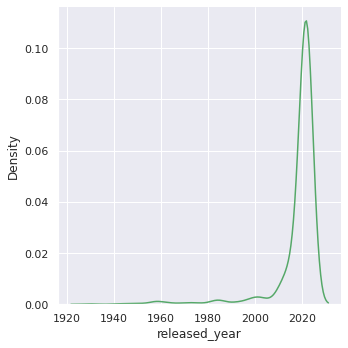

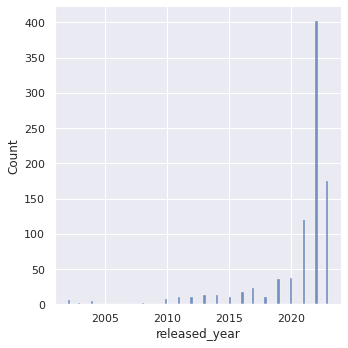

In [14]:
#Plot released_year Data to see how the distribution is
df_year_distribution = sns.displot(data=df,x='released_year', kind='kde',color="g")


#Seems that majority of the songs are after 2000 -- I'll look at the distribution of the data after the year 2000
#Also, because the year data is ordinal, not continuous, better to use a bar graph
post_2000_distribution = sns.displot(df[df['released_year']>2000], x='released_year')


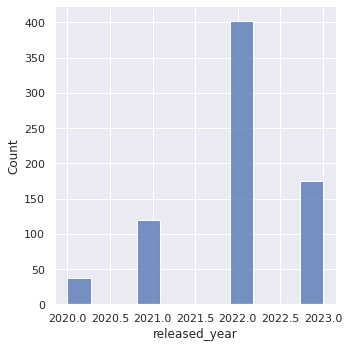

In [15]:
#Based on the distribution of the songs release year, I will only include songs that were released 2020 and onward. 

df_2020 = df[df['released_year']>=2020].copy()
df_2000_distribution = sns.displot(df_2020, x='released_year')


After much consideration, I think I only want to look at the songs released in the year 2022. This is because this year of songs is most prominent in the dataset and the songs that were released prior to 2020 are likely outliers to the musical trends occurring in 2022. Basically, I believe I'll be able to get a more accurate prediction for the types of musical attributes in most recent songs than if I include all the songs (some which go back to 1930!) 


In [16]:
df_2022 = df[df['released_year']==2022].copy()
df_2022.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
artist_count,402.0,1.584577e+00,9.093918e-01,1.0,1.000000e+00,1.0,2.000000e+00,7.000000e+00
released_year,402.0,2.022000e+03,0.000000e+00,2022.0,2.022000e+03,2022.0,2.022000e+03,2.022000e+03
released_month,402.0,6.440299e+00,3.525846e+00,1.0,4.000000e+00,6.0,1.000000e+01,1.200000e+01
released_day,402.0,1.371891e+01,8.342906e+00,1.0,6.000000e+00,13.0,2.100000e+01,3.100000e+01
in_spotify_playlists,402.0,2.213677e+03,2.239364e+03,86.0,8.290000e+02,1545.0,2.786250e+03,2.357500e+04
in_spotify_charts,402.0,8.057214e+00,1.540053e+01,0.0,0.000000e+00,0.0,9.000000e+00,1.300000e+02
streams,402.0,2.895582e+08,2.591904e+08,2762.0,1.354861e+08,222511700.0,3.349895e+08,2.513188e+09
in_apple_playlists,402.0,4.099254e+01,5.081493e+01,0.0,1.000000e+01,23.0,5.050000e+01,4.030000e+02
in_apple_charts,402.0,3.833831e+01,4.327370e+01,0.0,3.000000e+00,19.5,6.600000e+01,2.750000e+02
in_deezer_playlists,402.0,5.446766e+01,9.253843e+01,0.0,1.100000e+01,23.0,5.675000e+01,8.630000e+02


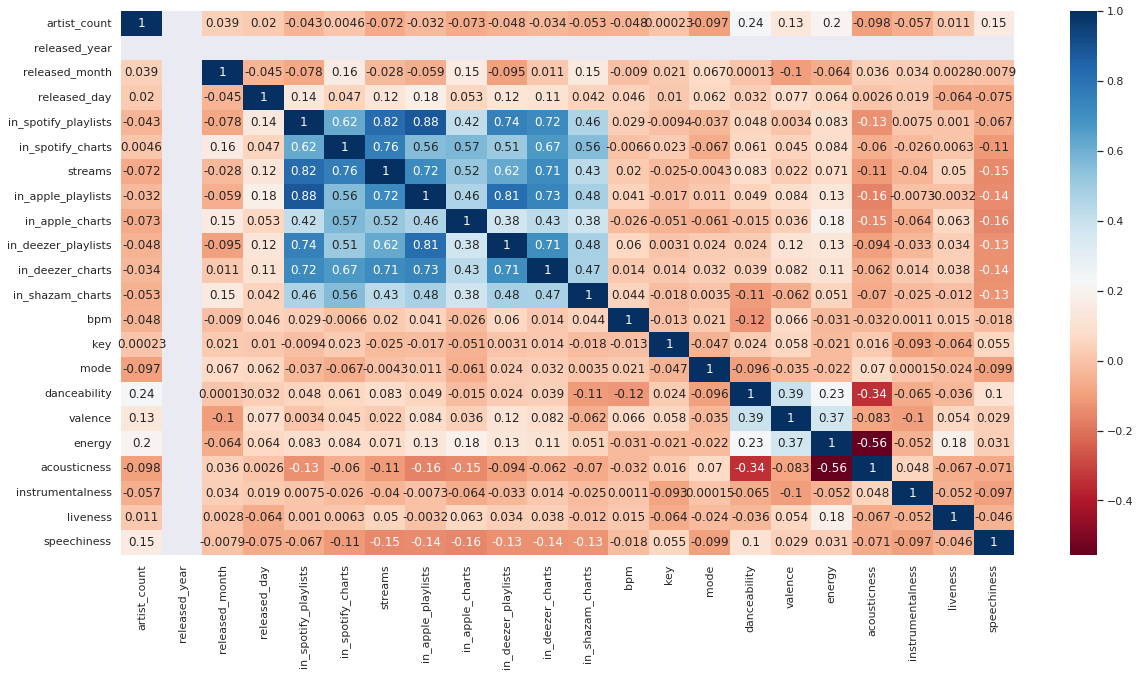

In [17]:
#Now let's look at simple correlation heatmap could reveal any correlations between the variables
plt.figure(figsize=(20,10))

corr2022_plot = sns.heatmap(df_2022.corr(), annot=True, cmap='RdBu')


First, I can see that because the data only has one year value, there are no correlations between the year and the rest of the data. 

Second, it is apparent that the most correlated variables are the number of streams and whether or not a song is in a playlist or chart -- this makes sense because if a song is on a playlist, it is sort of 'bookmarking' the song for being listened to more often and being accessed more easily. This will absolutely affect how often the song is streamed. 

However, this project is meant to focus on the musical attributes of the song, so the most correlated variables to streams are not relevant to the analysis. Looking at the correlations between danceability and valence as weel as the correlation between valence and energy may hint at colinearity between the variables. I'm going to make a correlation heat map again with only focusing on the musical attributes.


In [20]:
#Let's make a smaller dataframe with only the musical attributes of the songs
music_att = ['released_month','bpm',
 'key',
 'mode',
 'danceability',
 'valence',
 'energy',
 'acousticness',
 'instrumentalness',
 'liveness',
 'speechiness',
 'artist_count',
 'streams'
]

#I decided to keep artist_count in case it affects streams -- a more popular artist will have more songs streaming
#So this may introduce colinearity but might be useful to look at in models more complex than regression

df_music = df_2022[music_att].copy()

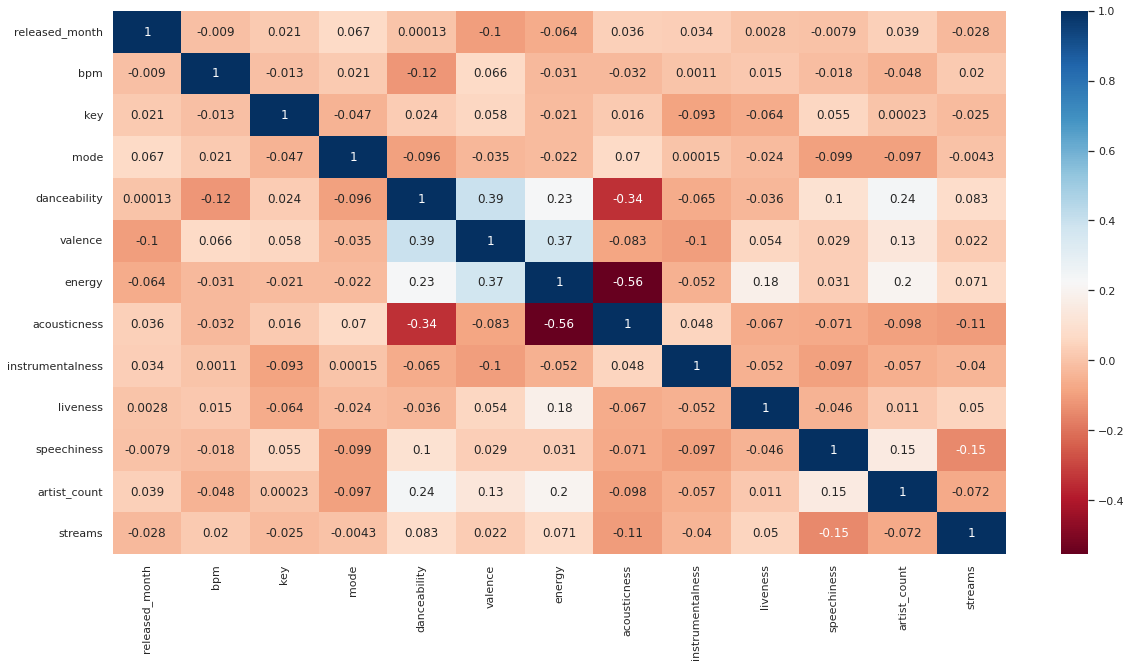

In [21]:
plt.figure(figsize=(20,10))

corr_music = sns.heatmap(df_music.corr(), annot=True, cmap='RdBu')


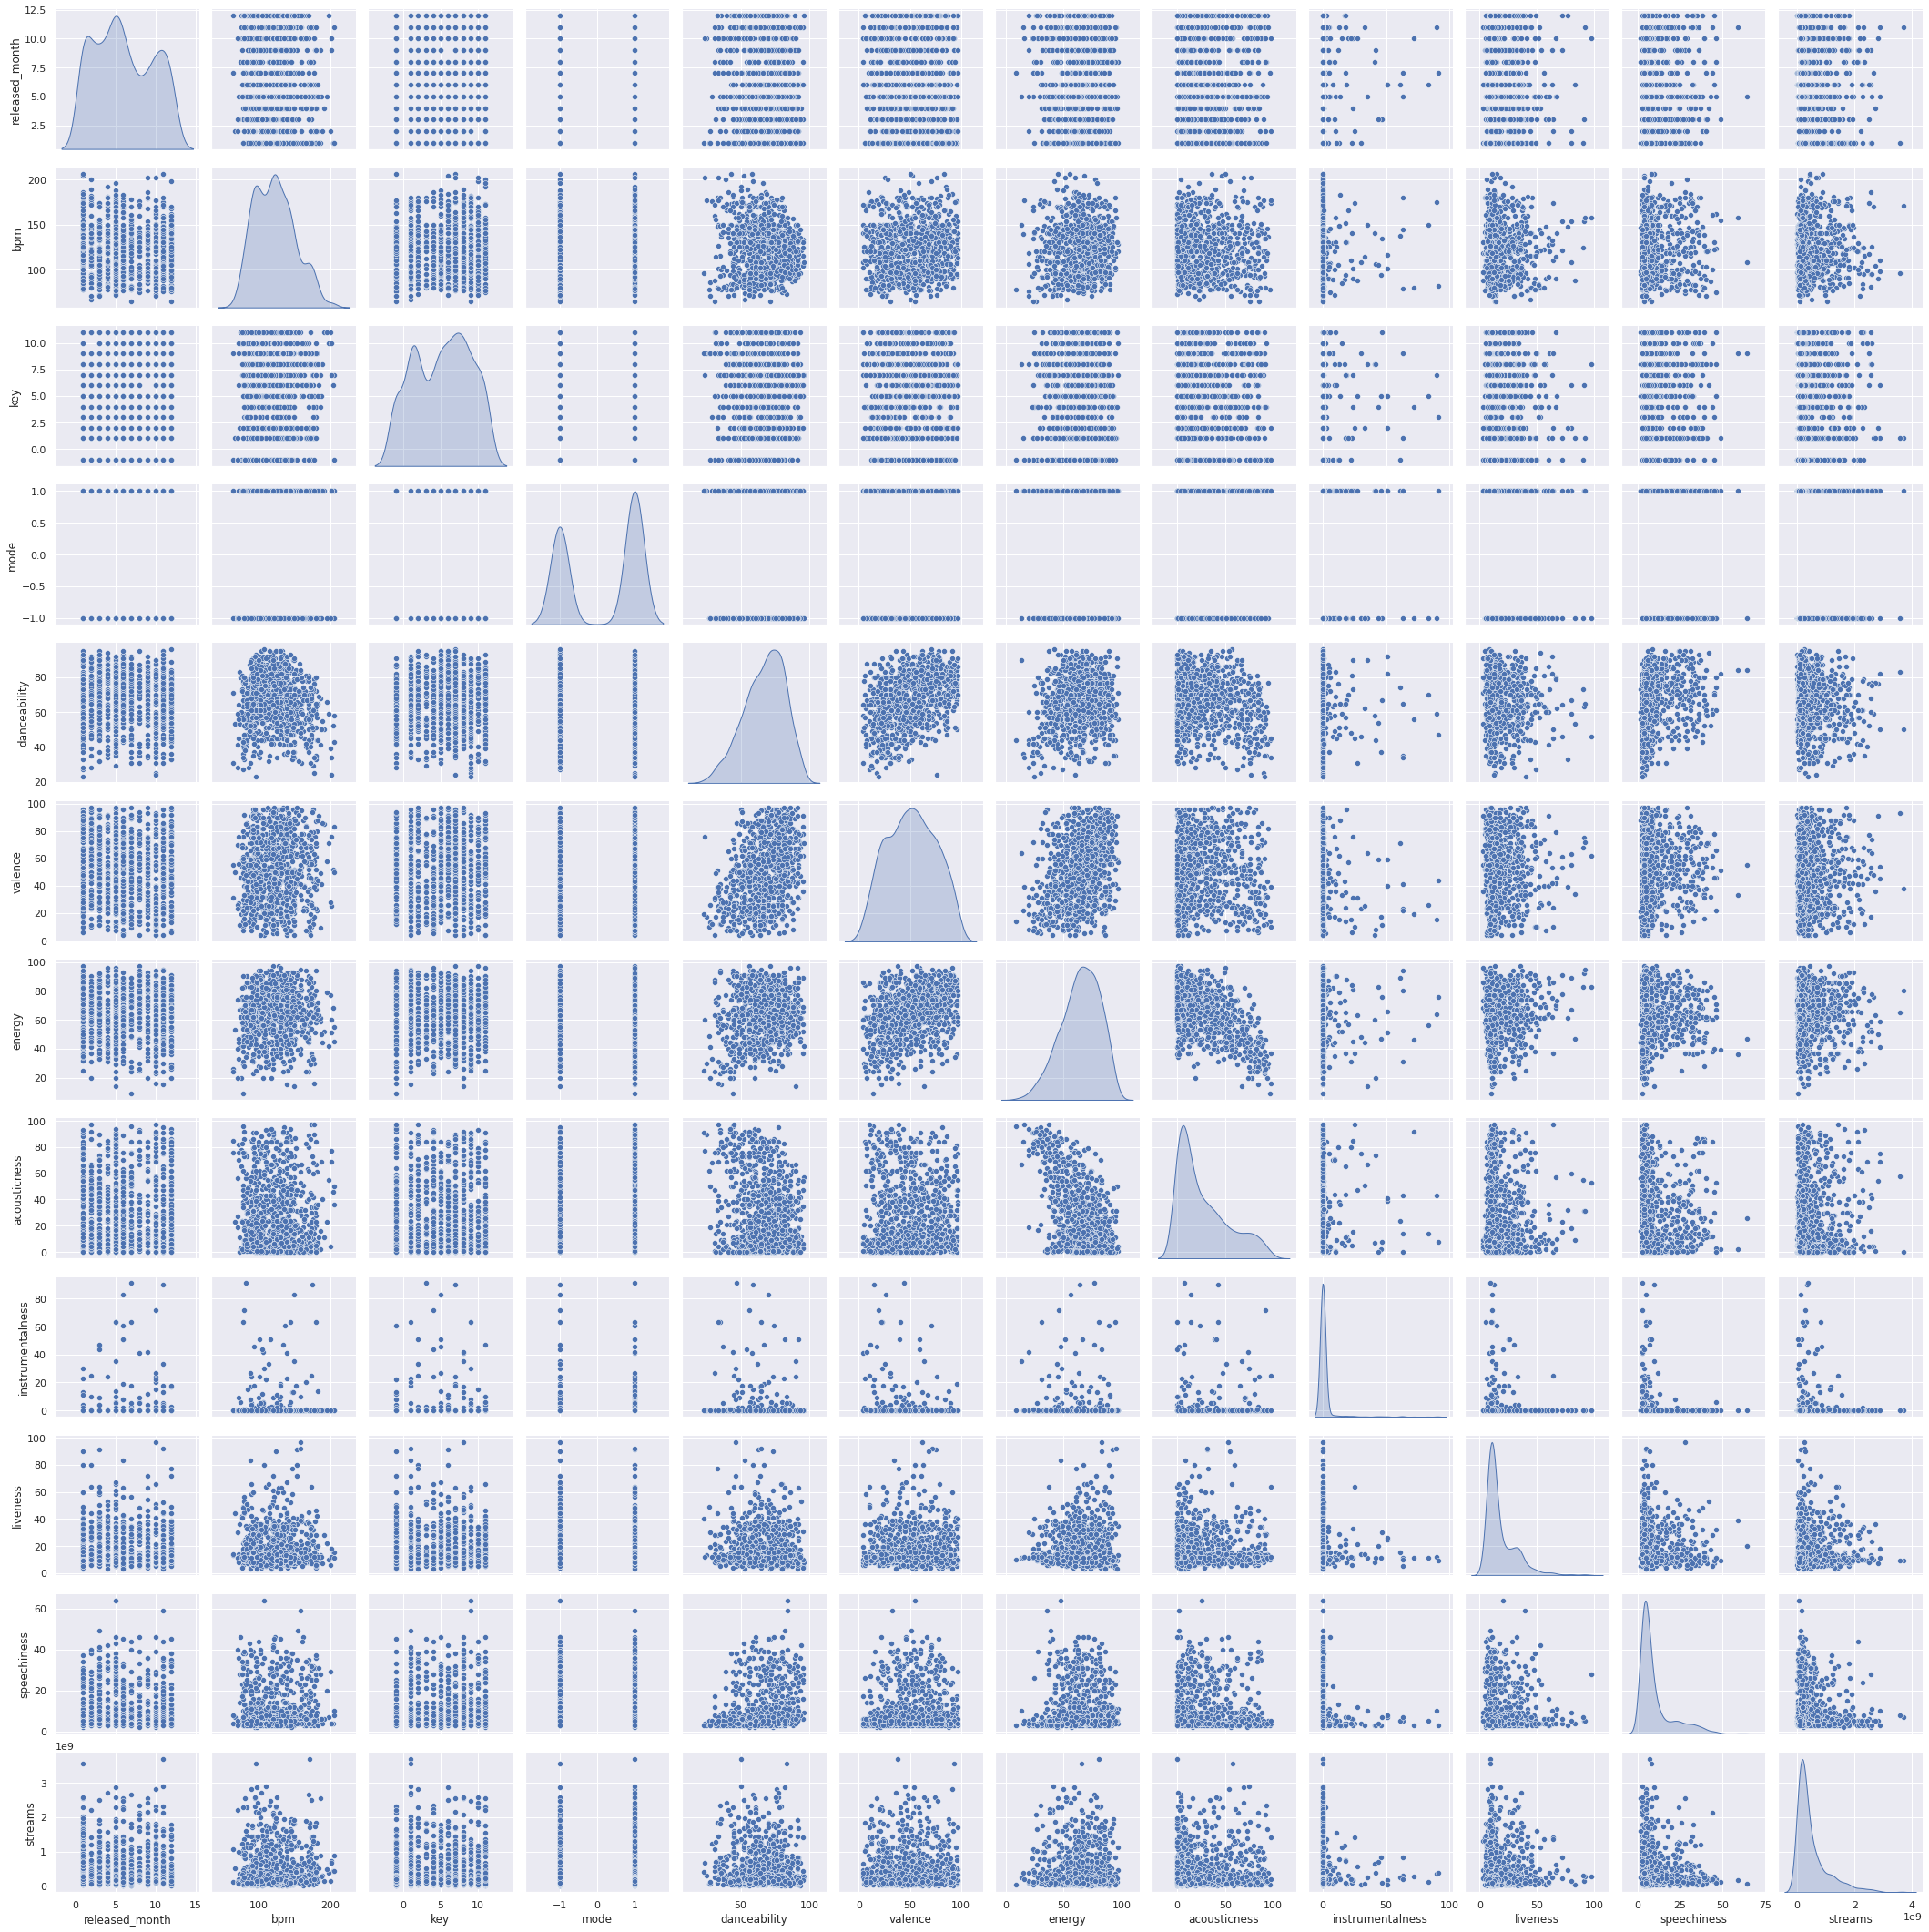

In [279]:
#Let's look at a pairplot
prplot = sns.pairplot(df,
             x_vars =['released_month','bpm','key', 'mode', 'danceability', 'valence', 'energy',
                      'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'streams'],
             y_vars= ['released_month','bpm','key', 'mode', 'danceability', 'valence', 'energy',
                      'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'streams'],
             diag_kind = 'kde'
            )
#plt.savefig('wk1prplotpairplot.jpeg')

The pairplot shows in more detail what the correlations between attributes look like - Valence and energy seem to have a small but positive correlation whereas it is kind of obvious that energy and acousticness have a negative correlation.   

In [22]:
dropdown = alt.binding_select(options=df_music['released_month'].unique(), name="Select a month:")
selection = alt.selection_multi(fields=['released_month'], bind=dropdown)

alt.Chart(df_music).mark_circle().encode(
    x = 'danceability',
    y = 'streams',
    color = alt.Color('bpm', scale=alt.Scale(scheme="yellowgreenblue")),
    tooltip=['streams','released_month'],
    opacity = alt.condition(selection, alt.value(1.0), alt.value(0.5))
).add_selection(selection)



/home/pao/.local/lib/python3.10/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_multi' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/home/pao/.local/lib/python3.10/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.Chart(...)

This interactive graph is just cool! You can togle month by month to see how the streams are affected by danceability and bpm. 

## Models

For the models, I want to look at the linear regression model first to get a starting point for what R-Squared values we get from the model. Given the fact that there might be collinearity between a few attributes (energy and valence, danceability and valence), I'll try to take into account when doing the regression.

Then, using these values, I'll create a polynomial regression model to see how it fits the data and then move into a multiple linear regression model in case that works better. 

If The data fits the classifier tree conditions (dataset contains a binary variable for classification), I'll attempt at making a tree model as well. 

### Linear Regression Model

In [23]:
#Here, we can get a sense for which attributes most contribute to streams
corr_matrix = df_music.corr()
corr_matrix['streams'].abs().sort_values(ascending=False)


streams             1.000000
speechiness         0.150615
acousticness        0.105702
danceability        0.082532
artist_count        0.071581
energy              0.070798
liveness            0.050217
instrumentalness    0.039502
released_month      0.028456
key                 0.024642
valence             0.022308
bpm                 0.019661
mode                0.004343
Name: streams, dtype: float64

They're all pretty low values, but let's look at the adjusted r-squared values after fitting to linear regression models


In [24]:
model_speech = smf.ols('streams ~ speechiness', data = df_music).fit()
speech_rsq = model_speech.rsquared_adj
print('speechiness = ',speech_rsq)

model_acous = smf.ols('streams ~ acousticness', data = df_music).fit()
acous_rsq = model_acous.rsquared_adj
print('acousticness = ',acous_rsq)

model_dance = smf.ols('streams ~ danceability', data = df_music).fit()
dance_rsq = model_dance.rsquared_adj
print('danceability = ',dance_rsq)

model_energy = smf.ols('streams ~ energy', data = df_music).fit()
energy_rsq = model_energy.rsquared_adj
print('energy = ', energy_rsq)

model_liveness = smf.ols('streams ~ liveness', data = df_music).fit()
liveness_rsq = model_liveness.rsquared_adj
print('liveness = ', liveness_rsq)

model_instrument = smf.ols('streams ~ instrumentalness', data = df_music).fit()
instrument_rsq = model_instrument.rsquared_adj
print('instrumentalness = ', instrument_rsq)

model_valence = smf.ols('streams ~ valence', data = df_music).fit()
valence_rsq = model_valence.rsquared_adj
print('valence = ', valence_rsq)

model_bpm = smf.ols('streams ~ bpm', data = df_music).fit()
bpm_rsq = model_bpm.rsquared_adj
print('bpm = ', bpm_rsq)

model_key = smf.ols('streams ~ key', data = df_music).fit()
key_rsq = model_key.rsquared_adj
print('key = ', key_rsq)


speechiness =  0.02024168484113853
acousticness =  0.008700921037742781
danceability =  0.0043285282808545045
energy =  0.0025248386440794857
liveness =  2.8041004529244518e-05
instrumentalness =  -0.0009356514977427732
valence =  -0.002001088184271138
bpm =  -0.0021124604277864556
key =  -0.001891264179123553


All these attributes seem to have a small correlation to streams. Maybe looking at multiple factors in the model will have stronger correlations.


### Polynomial Regression up to N =10


Looking at a polynomial model regression up to N=10, then graphing how the R-Squared and R-Squared Adjusted values compare with each iteration of the regression. I also looked at this for 5 attributes only - Energy, Danceability, Valence, Speechiness and BPM. This decision was exploratory to see how the attributes compared in the models. 

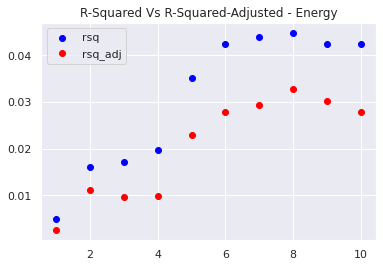

In [25]:
#energy

polynomial = []
rsqrd_Val = []
rsqrAdj_Val = []
for i in range(1,11):
    formula = f"streams ~ {' + '.join([f'np.power(energy, {n})' for n in range(1, i + 1)])}"

    poly_model = smf.ols(formula=formula,data =df_music).fit()

    polynomial.append(i)
    rsqrd_Val.append(poly_model.rsquared)
    rsqrAdj_Val.append(poly_model.rsquared_adj)

#
rsq = plt.scatter(polynomial,rsqrd_Val, color = 'blue')
rsq_adj = plt.scatter(polynomial,rsqrAdj_Val, color = 'red')
plt.title("R-Squared Vs R-Squared-Adjusted - Energy")
plt.legend(["rsq", "rsq_adj"])
plt.show()

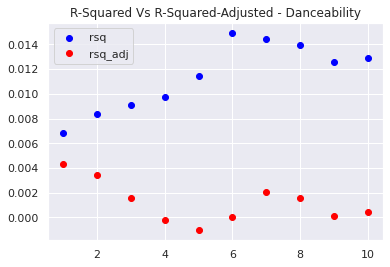

In [26]:
#Danceability
polynomial = []
rsqrd_Val = []
rsqrAdj_Val = []
for i in range(1,11):
    formula = f"streams ~ {' + '.join([f'np.power(danceability, {n})' for n in range(1, i + 1)])}"

    poly_model = smf.ols(formula=formula,data =df_music).fit()

    polynomial.append(i)
    rsqrd_Val.append(poly_model.rsquared)
    rsqrAdj_Val.append(poly_model.rsquared_adj)

#
rsq = plt.scatter(polynomial,rsqrd_Val, color = 'blue')
rsq_adj = plt.scatter(polynomial,rsqrAdj_Val, color = 'red')
plt.title("R-Squared Vs R-Squared-Adjusted - Danceability")
plt.legend(["rsq", "rsq_adj"])
plt.show()

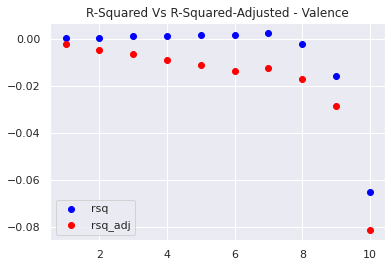

In [27]:
#Valence
polynomial = []
rsqrd_Val = []
rsqrAdj_Val = []
for i in range(1,11):
    formula = f"streams ~ {' + '.join([f'np.power(valence, {n})' for n in range(1, i + 1)])}"

    poly_model = smf.ols(formula=formula,data =df_music).fit()

    polynomial.append(i)
    rsqrd_Val.append(poly_model.rsquared)
    rsqrAdj_Val.append(poly_model.rsquared_adj)

#
rsq = plt.scatter(polynomial,rsqrd_Val, color = 'blue')
rsq_adj = plt.scatter(polynomial,rsqrAdj_Val, color = 'red')
plt.title("R-Squared Vs R-Squared-Adjusted - Valence")
plt.legend(["rsq", "rsq_adj"])
plt.show()

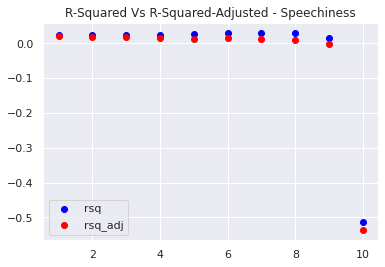

In [28]:
#Speechiness

polynomial = []
rsqrd_Val = []
rsqrAdj_Val = []
for i in range(1,11):
    formula = f"streams ~ {' + '.join([f'np.power(speechiness, {n})' for n in range(1, i + 1)])}"

    poly_model = smf.ols(formula=formula,data =df_music).fit()

    polynomial.append(i)
    rsqrd_Val.append(poly_model.rsquared)
    rsqrAdj_Val.append(poly_model.rsquared_adj)

#
rsq = plt.scatter(polynomial,rsqrd_Val, color = 'blue')
rsq_adj = plt.scatter(polynomial,rsqrAdj_Val, color = 'red')
plt.title("R-Squared Vs R-Squared-Adjusted - Speechiness")
plt.legend(["rsq", "rsq_adj"])
plt.show()

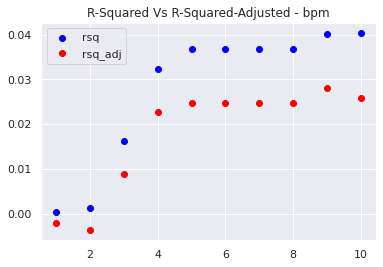

In [29]:
#BPM

polynomial = []
rsqrd_Val = []
rsqrAdj_Val = []
for i in range(1,11):
    formula = f"streams ~ {' + '.join([f'np.power(bpm, {n})' for n in range(1, i + 1)])}"

    poly_model = smf.ols(formula=formula,data =df_music).fit()

    polynomial.append(i)
    rsqrd_Val.append(poly_model.rsquared)
    rsqrAdj_Val.append(poly_model.rsquared_adj)

#
rsq = plt.scatter(polynomial,rsqrd_Val, color = 'blue')
rsq_adj = plt.scatter(polynomial,rsqrAdj_Val, color = 'red')
plt.title("R-Squared Vs R-Squared-Adjusted - bpm")
plt.legend(["rsq", "rsq_adj"])
plt.show()

Based off these graphs, it looks like bpm and energy work with multiple regression models, but the other variables might be best suited for logistic regression. 

Worth noting that bpm and energy might be related, so I'm going to look at a multiple regression model with those two variables to look at pvalues and check for collinearity.

In [30]:
bpm_energy = smf.ols('streams~ bpm + energy', data=df_music).fit()
bpm_energy.summary()

# This shows that a large p-value and and high standard error values which 
#signify colinearity between the two variables


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                streams   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.102
Date:                Tue, 12 Dec 2023   Prob (F-statistic):              0.333
Time:                        10:15:17   Log-Likelihood:                -8356.8
No. Observations:                 402   AIC:                         1.672e+04
Df Residuals:                     399   BIC:                         1.673e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.933e+08   7.78e+07      2.485      0.013    4.04e+07    3.46e+08
bpm         2.041e+05   4.65e+05      0.439      0.661   -7.11e+05    1.12e+06
energy      1.122e+06   7.84e+05      1.431      0.153   -4.19e+05    2.66e+06
==============================================================================
Omnibus:                      299.011   Durbin-Watson:                   0.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4675.114
Skew:                           3.041   Prob(JB):                         0.00
Kurtosis:                      18.560   Cond. No.                         842.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multiple Regression model

I'll now do a forward stepwise refinement technique to see if there is a combination of factors that could predict streams better than each factor alone.

In [31]:
allowed_attributes = ['speechiness','acousticness','danceability','energy','liveness','instrumentalness',
                      'valence', 'bpm']

X_train, X_test = train_test_split(df_music,test_size=.2, train_size=.8)



In [32]:
best = ['',0]
for p in allowed_attributes:
    model  = smf.ols(formula='streams~'+p, data=X_train).fit()
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

train1 = smf.ols(formula='streams~speechiness', data=X_train).fit()

best: ['speechiness', 0.021990948202373906]


In [40]:
best = ['',0,0]
for p in range(len(allowed_attributes)):
    for k in range(p+1,len(allowed_attributes)):
        formula = 'streams~'+ allowed_attributes[p] +'+' + allowed_attributes[k]
        model  = smf.ols(formula=formula, data=X_train).fit()
        if model.rsquared>best[2]:
            best = [allowed_attributes[p],allowed_attributes[k], model.rsquared]
print('best:',best)
train2 = smf.ols(formula='streams~speechiness+acousticness', data=X_train).fit()


best: ['speechiness', 'acousticness', 0.03391214791612529]


In [39]:
best = ['',0,0,0]
for p in range(len(allowed_attributes)):
    for k in range(p+1,len(allowed_attributes)):
        for l in range(k+1, len(allowed_attributes)):
            formula = 'streams~'+ allowed_attributes[p] +'+' + allowed_attributes[k]+'+'+allowed_attributes[l]
            model  = smf.ols(formula=formula, data=X_train).fit()
            if model.rsquared>best[3]:
                best = [allowed_attributes[p],allowed_attributes[k],allowed_attributes[l], model.rsquared]
print('best:',best)
train3= smf.ols(formula='streams~speechiness+energy+danceability', data=X_train).fit()

best: ['speechiness', 'danceability', 'energy', 0.03739066658635759]


In [36]:
best = ['',0,0,0,0]
for p in range(len(allowed_attributes)):
    for k in range(p+1,len(allowed_attributes)):
        for l in range(k+1, len(allowed_attributes)):
            for m in range(l+1, len(allowed_attributes)):
                formula = 'streams~'+ allowed_attributes[p] +'+' + allowed_attributes[k]+'+'+allowed_attributes[l]+'+'+allowed_attributes[m]
                model  = smf.ols(formula=formula, data=X_train).fit()
                if model.rsquared>best[4]:
                    best = [allowed_attributes[p],allowed_attributes[k],allowed_attributes[l],allowed_attributes[m], model.rsquared]
print('best:',best)

train4 = smf.ols(formula='streams~speechiness+energy+danceability+bpm', data=X_train).fit()

best: ['speechiness', 'danceability', 'energy', 'bpm', 0.039416110989742736]


In [38]:
best = ['',0,0,0,0,0]
for p in range(len(allowed_attributes)):
    for k in range(p+1,len(allowed_attributes)):
        for l in range(k+1, len(allowed_attributes)):
            for m in range(l+1, len(allowed_attributes)):
                for n in range(m+1, len(allowed_attributes)):
                    formula = 'streams~'+ allowed_attributes[p] +'+' + allowed_attributes[k]+'+'+allowed_attributes[l]+'+'+allowed_attributes[m]+'+'+allowed_attributes[n]
                    model  = smf.ols(formula=formula, data=X_train).fit()
                    if model.rsquared>best[5]:
                        best = [allowed_attributes[p],allowed_attributes[k],allowed_attributes[l],allowed_attributes[m],allowed_attributes[n], model.rsquared]
print('best:',best)

train5 = smf.ols(formula='streams~speechiness+energy+danceability+bpm+instrumentalness', data=X_train).fit()

best: ['speechiness', 'danceability', 'energy', 'instrumentalness', 'bpm', 0.04112143103943866]


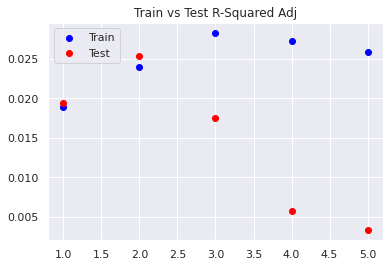

In [41]:
rsqrAdj_train = [train1.rsquared_adj,train2.rsquared_adj,train3.rsquared_adj,train4.rsquared_adj,train5.rsquared_adj] 
num_predictors = [1,2,3,4,5]

test1 = smf.ols(formula='streams~speechiness', data=X_test).fit()
test2 = smf.ols(formula='streams~speechiness+acousticness', data=X_test).fit()
test3= smf.ols(formula='streams~speechiness+energy+danceability', data=X_test).fit()
test4 = smf.ols(formula='streams~speechiness+energy+danceability+bpm', data=X_test).fit()
test5 = smf.ols(formula='streams~speechiness+energy+danceability+bpm+instrumentalness', data=X_test).fit()

rsqrAdj_test = [test1.rsquared_adj,test2.rsquared_adj,test3.rsquared_adj,test4.rsquared_adj,test5.rsquared_adj]

plt.scatter(num_predictors,rsqrAdj_train,color='blue')
plt.scatter(num_predictors,rsqrAdj_test,color='red')
plt.title("Train vs Test R-Squared Adj")
plt.legend(["Train","Test"])

#### Results for model above

This graph shows how the R-squared adjusted values change from the training to the test data - after 2 variables, the model decreases drastically in rsquared adjusted values.

### Decision Tree Classifier

One last model to try is to look at is a binary classification model. I will look at the streams data and create an threshold for creating a binary variable that will be predicted by the model. I'll create a new column for this binary variable such that if the number of streams for a song go over the threshold value, it will be classified as '1' and if not, it will be classified as '-1'

,count,mean,std,min,25%,50%,75%,max
released_month,402.0,6.440299e+00,3.525846e+00,1.0,4.000000e+00,6.0,1.000000e+01,1.200000e+01
bpm,402.0,1.220050e+02,2.782534e+01,65.0,9.925000e+01,120.0,1.400000e+02,2.000000e+02
key,402.0,5.211443e+00,3.679500e+00,-1.0,2.000000e+00,5.0,8.000000e+00,1.100000e+01
mode,402.0,1.442786e-01,9.907702e-01,-1.0,-1.000000e+00,1.0,1.000000e+00,1.000000e+00
danceability,402.0,6.871393e+01,1.481020e+01,25.0,5.800000e+01,71.0,8.000000e+01,9.500000e+01
valence,402.0,5.149005e+01,2.310361e+01,4.0,3.200000e+01,52.0,7.075000e+01,9.700000e+01
energy,402.0,6.358209e+01,1.651054e+01,16.0,5.300000e+01,64.0,7.575000e+01,9.700000e+01
acousticness,402.0,2.742289e+01,2.552423e+01,0.0,6.000000e+00,18.5,4.300000e+01,9.700000e+01
instrumentalness,402.0,1.286070e+00,7.005894e+00,0.0,0.000000e+00,0.0,0.000000e+00,8.300000e+01
liveness,402.0,1.849254e+01,1.372480e+01,3.0,1.000000e+01,13.0,2.400000e+01,9.200000e+01


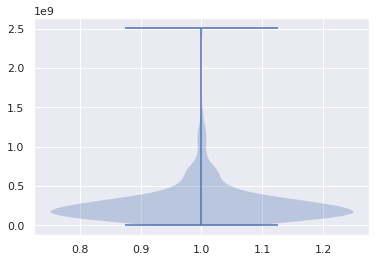

In [42]:
plt.violinplot(df_music.streams) #Shows a distribution of the streams values
df_music.describe().transpose()

In [43]:
#It looks like the  majority of the songs have streams less than 500,000,000 
#I'll make that the threshold for the binary variable 'billion_streams'

df_music['billion_streams']= (df_music['streams']>500000000).astype(int)

In [44]:
df_music['billion_streams'] = df_music['billion_streams'].map({0: -1, 1:1})

In [46]:
#Create test and train data

x_att = ['bpm',
 'key',
 'danceability',
 'valence',
 'energy',
 'acousticness',
 'instrumentalness',
 'liveness',
 'speechiness']
y_att = df_music['billion_streams']

x_train, x_test, y_train, y_test = train_test_split(df_music[x_att],y_att, test_size=.2)


In [47]:
decisionTree= DecisionTreeClassifier(random_state=5).fit(x_train,y_train)

In [48]:
def calculate_precision(y_true, y_pred, pos_label_value=1.0):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0.0
    return precision

def calculate_recall(y_true, y_pred, pos_label_value=1.0):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0.0
    return recall

In [50]:
predict = decisionTree.predict(x_test)
predict

array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1])

Number of nodes in the last tree is: 1 with ccp_alpha: 0.007809570919156688


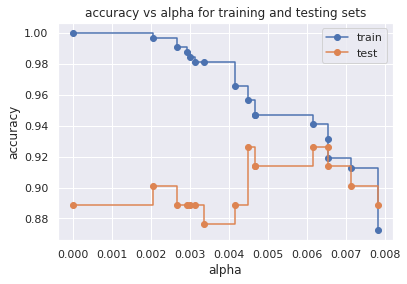

In [53]:
dt = DecisionTreeClassifier(random_state=5).fit(x_train, y_train)

path = dt.cost_complexity_pruning_path(x_train,y_train) #post pruning
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = [] # VECTOR CONTAINING CLASSIFIERS FOR DIFFERENT ALPHAS
# TODO: iterate over ccp_alpha values 
# your code here
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)


    
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

# TODO: next, generate the train and test scores and plot the variation in these scores with increase in ccp_alpha
# The code for plotting has been provided; edit the train_scores and test_scores variables for the right plot to be generated
train_scores = []
test_scores = []

# your code here
for clf in clfs:
    train_scores.append(clf.score(x_train, y_train))
    test_scores.append(clf.score(x_test, y_test))


fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show() 


#### Results for above model: 

It seems that the model for the testing data has a 'sweet' spot where it intersects with the training data accuracy and then decreases - at about 0.93 accuracy. This is pretty good! 

### Discussion and Conclusion



After considering the three models I implemented and how well each performed, I can conclude that no, there are no obvious patterns of musical attributes that are strongly correlated with the amount of streams the song will get. 

The linear regression was useful as a starting point and for getting a general sense of what the data looks like. Moving on to multiple regression models seemed to increase the correlation between the musical attributes and the streams thought the R-Squared adjusted value didn't grow past 0.06 which is still a very low value for predicting. 

The decision tree model gave very interesting results -- the accuracy when using the training data was decreasing with the ccp_alpha value increase, while the model with the testing data did the inverse. I am not sure why this is, though it is intriguing to think about. I also believe my implementation might not be the most correct implementation for this type of model. 

I think further exploration of the data is necessary to gain a better understanding of what model would work for predicting streams but also classifying a song as 'billion_streams' or not. Something interesting to try could be AdaBoost techniques. 

Additionally, I think I need to improve my ability to discern the efficiency and accuracy of the model. I may already have a good model going but not enough skills to test the model's ability and prove it works. 